# Explorator Data Analysis for Breast Cancer Wisconsin (Diagnostic) [Data Set](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29):

## EDA Steps:

1. Display summary statistics
2. Explore values and impute missing data
3. Display histogram of individual features
4. Visualize Distribution of values with outcomes
5. Bivariates scatter plots
6. Correlation between features
7. Dimensionality reduciton using PCA and TSNE
8. Simple classifer.

In [2]:
import pandas as pd
import numpy as np

In [3]:
! wget http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data
! wget http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names    

--2020-05-11 13:10:16--  http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19889 (19K) [application/x-httpd-php]
Saving to: ‘breast-cancer-wisconsin.data.4’

breast-cancer-wisco 100%[===================>]  19.42K  --.-KB/s    in 0.1s    

2020-05-11 13:10:16 (157 KB/s) - ‘breast-cancer-wisconsin.data.4’ saved [19889/19889]

--2020-05-11 13:10:16--  http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5657 (5.5K) [application/x-httpd-php]
Saving to: ‘

In [4]:
headers = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape",
           "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"]

In [5]:
raw_data = pd.read_csv("./breast-cancer-wisconsin.data", names=headers)

In [6]:
raw_data

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [8]:
def describe_data(data):
    for column in data.columns:
        display(pd.crosstab(index=data[column],
                        columns='% observations', 
                        normalize='columns'))
        print("# of unique values {}".format(data[column].nunique()))

In [9]:
describe_data(raw_data)

col_0,% observations
Sample code number,
61634,0.001431
63375,0.001431
76389,0.001431
95719,0.001431
128059,0.001431
...,...
1369821,0.001431
1371026,0.001431
1371920,0.001431


# of unique values 645


col_0,% observations
Clump Thickness,
1,0.207439
2,0.071531
3,0.154506
4,0.114449
5,0.185980
6,0.048641
7,0.032904
8,0.065808
9,0.020029


# of unique values 10


col_0,% observations
Uniformity of Cell Size,
1,0.549356
2,0.064378
3,0.074392
4,0.057225
5,0.042918
6,0.038627
7,0.027182
8,0.041488
9,0.008584


# of unique values 10


col_0,% observations
Uniformity of Cell Shape,
1,0.505007
2,0.084406
3,0.080114
4,0.062947
5,0.048641
6,0.042918
7,0.042918
8,0.040057
9,0.010014


# of unique values 10


col_0,% observations
Marginal Adhesion,
1,0.582260
2,0.082976
3,0.082976
4,0.047210
5,0.032904
6,0.031474
7,0.018598
8,0.035765
9,0.007153


# of unique values 10


col_0,% observations
Single Epithelial Cell Size,
1,0.067239
2,0.552217
3,0.103004
4,0.068670
5,0.055794
6,0.058655
7,0.017167
8,0.030043
9,0.002861


# of unique values 10


col_0,% observations
Bare Nuclei,
1,0.575107
10,0.188841
2,0.042918
3,0.040057
4,0.027182
5,0.042918
6,0.005722
7,0.011445
8,0.030043


# of unique values 11


col_0,% observations
Bland Chromatin,
1,0.217454
2,0.237482
3,0.236052
4,0.057225
5,0.048641
6,0.014306
7,0.104435
8,0.040057
9,0.015737


# of unique values 10


col_0,% observations
Normal Nucleoli,
1,0.633763
2,0.051502
3,0.062947
4,0.025751
5,0.027182
6,0.031474
7,0.022890
8,0.034335
9,0.022890


# of unique values 10


col_0,% observations
Mitoses,
1,0.828326
2,0.050072
3,0.047210
4,0.017167
5,0.008584
6,0.004292
7,0.012876
8,0.011445
10,0.020029


# of unique values 9


col_0,% observations
Class,
2,0.655222
4,0.344778


# of unique values 2


In [10]:
#Replace missing values '?' by NaN which works with sklearn libraries

data = raw_data.replace(to_replace = '?', value = np.nan)

In [11]:
#Show the number of valid outputs in every column
for column in data.columns:
    print("{1}, {0}".format(column, data[column].count()))

699, Sample code number
699, Clump Thickness
699, Uniformity of Cell Size
699, Uniformity of Cell Shape
699, Marginal Adhesion
699, Single Epithelial Cell Size
683, Bare Nuclei
699, Bland Chromatin
699, Normal Nucleoli
699, Mitoses
699, Class


## Impute "Bare Nuclei" with median manually

In [12]:
#Calculate the median of all features
data.median()

Sample code number             1171710.0
Clump Thickness                      4.0
Uniformity of Cell Size              1.0
Uniformity of Cell Shape             1.0
Marginal Adhesion                    1.0
Single Epithelial Cell Size          2.0
Bare Nuclei                          1.0
Bland Chromatin                      3.0
Normal Nucleoli                      1.0
Mitoses                              1.0
Class                                2.0
dtype: float64

In [13]:
#Make sure there are 16 NaN, we need to convert the features as float first.
np.sum(np.isnan(data["Bare Nuclei"].astype(np.float64)))

16

In [14]:
#Convert object colums to float64
data = data.astype({'Bare Nuclei': 'float64'}, copy=False)
data.dtypes

Sample code number               int64
Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

In [15]:
def replace_NaN(x, median):
    """
    Replaces NaN values with median
    Arguments: 
        x: float
            The value of a feature
        median: float
            The value to replace x with in case it is NaN
    """
    if np.isnan(x):
        return median
    else:
        return x

In [16]:
#Use map to apply the function to the whole column
data["Bare Nuclei"] = data["Bare Nuclei"].map(lambda x: replace_NaN(x,1))

In [17]:
#Make sure there are no more NaN
np.sum(np.isnan(data["Bare Nuclei"]))

0

In [18]:
data = data.astype({'Bare Nuclei': 'int64'}, copy=False)

In [19]:
data.dtypes

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [20]:
#Drop "Sample code number column as this is not a clinical feature"
data = data.drop(["Sample code number"], axis = 1)

In [21]:
#Describe summary statistics of numerical data
data.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


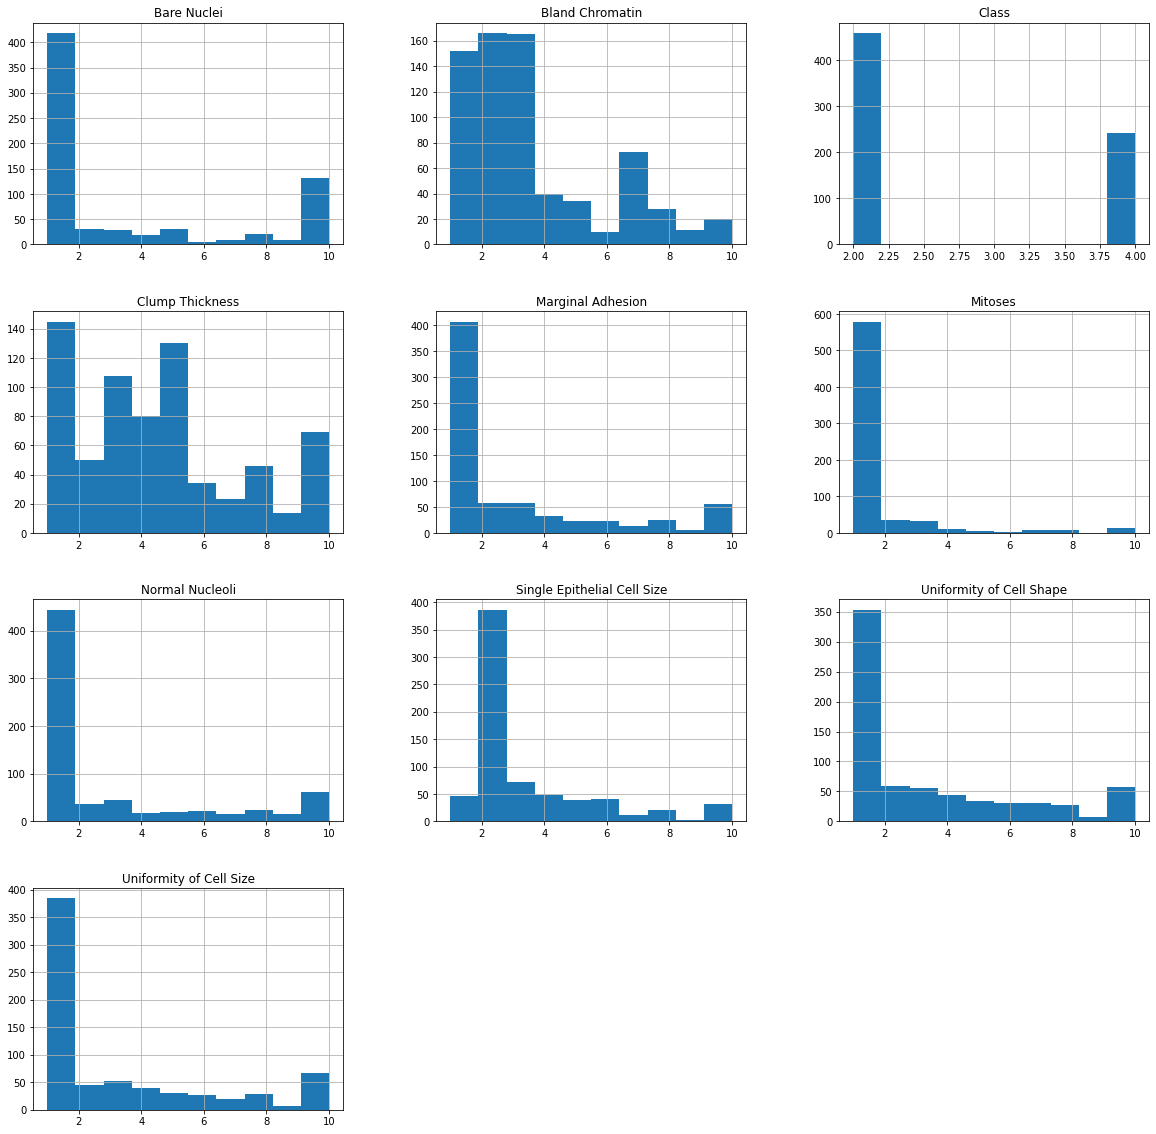

In [22]:
#Display histograms for numerical data
hist = data.hist(bins=10, figsize=(20,20))

In [23]:
#Next EDA will be applied on the features only, thus remove the "Class" outcome
numerical_categories = list(data.columns)
numerical_categories.remove("Class")
numerical_categories

['Clump Thickness',
 'Uniformity of Cell Size',
 'Uniformity of Cell Shape',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bare Nuclei',
 'Bland Chromatin',
 'Normal Nucleoli',
 'Mitoses']

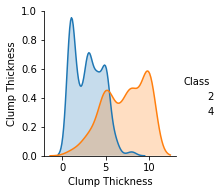

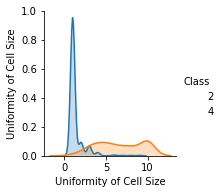

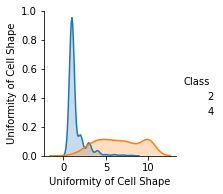

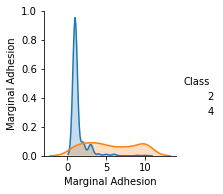

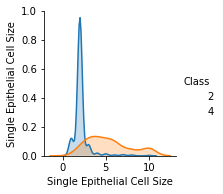

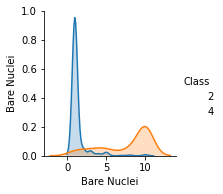

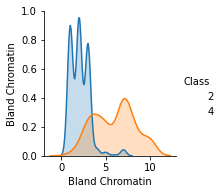

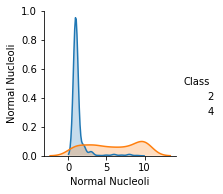

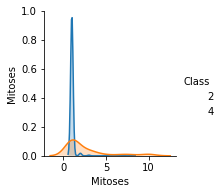

In [24]:
#Display the distribution of the variable versus the outcomes
import seaborn as sns
for cat in numerical_categories:
    sns.pairplot(data, x_vars = cat, y_vars=cat, hue="Class")

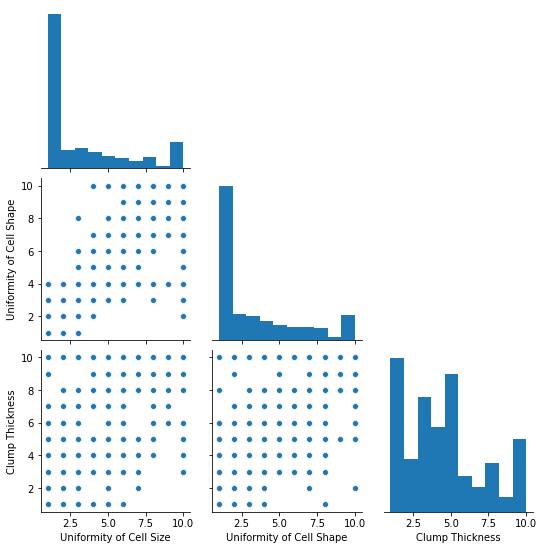

In [25]:
#Bivariate Scatter plots
scatter_cat = ["Uniformity of Cell Size", "Uniformity of Cell Shape", "Clump Thickness"] 
sns.pairplot(data, x_vars = scatter_cat , y_vars = scatter_cat, corner = True)

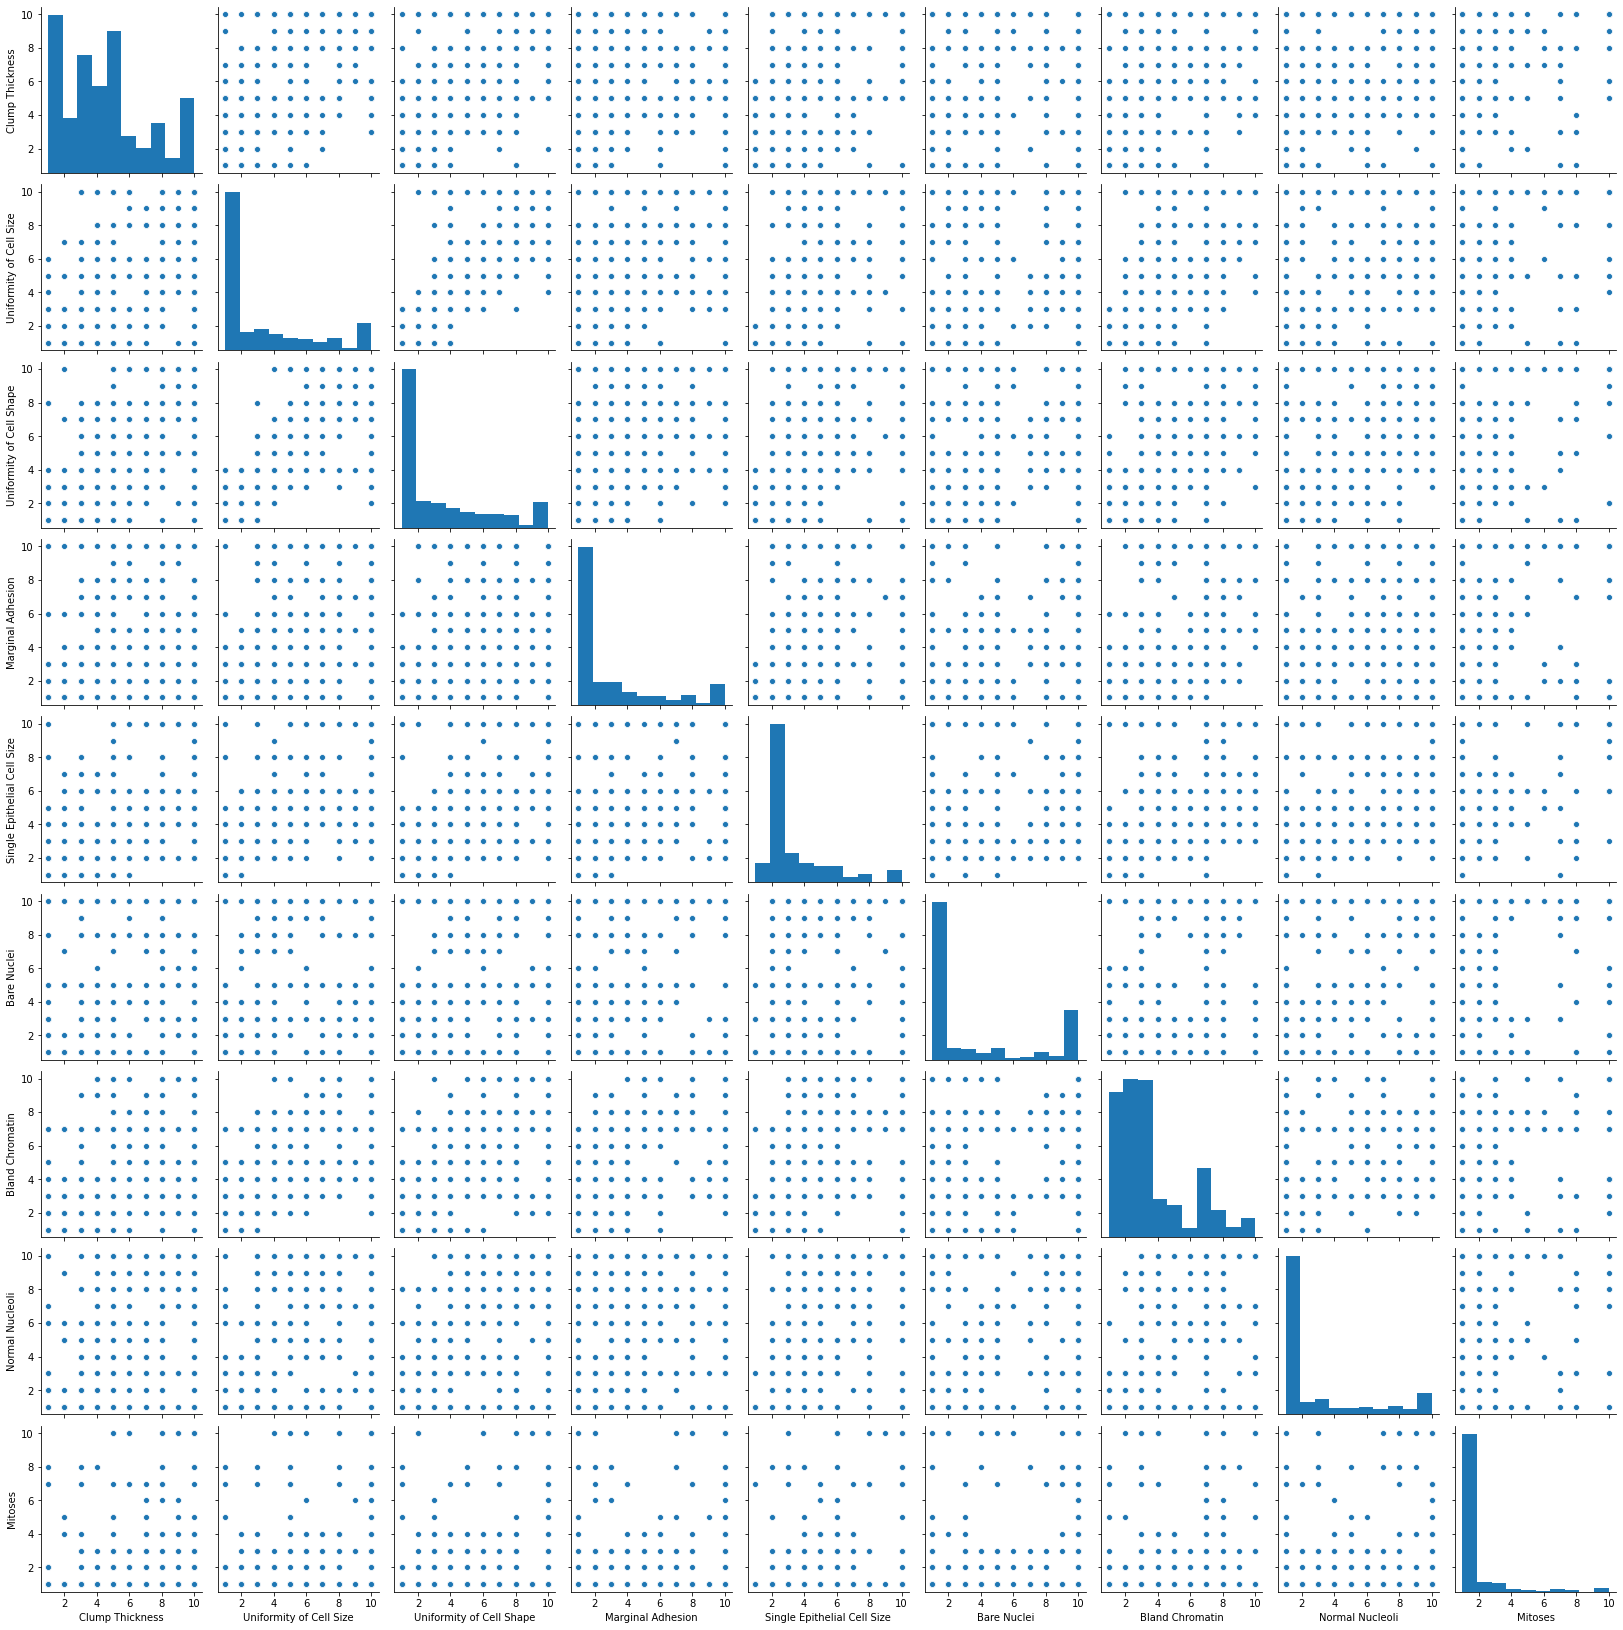

In [26]:
sns.pairplot(data, x_vars = numerical_categories, y_vars=numerical_categories)

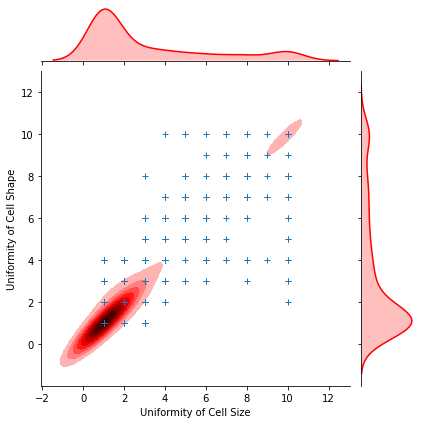

In [27]:
import matplotlib.pyplot as plt
g = sns.jointplot(x="Uniformity of Cell Size", y="Uniformity of Cell Shape", data=data, kind="kde", color="r")
g.plot_joint(plt.scatter, s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("Uniformity of Cell Size", "Uniformity of Cell Shape");

/Users/zakigf/anaconda2/envs/eda/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


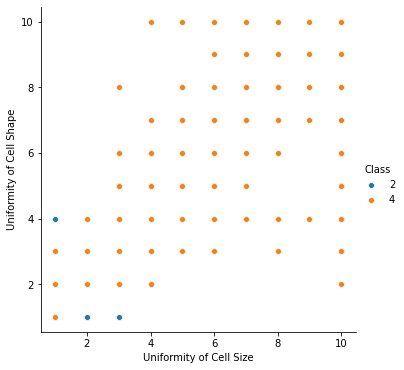

In [28]:
#Multivariate plots using hue to add a third variable. "Size" and "shape" can be used to add a 4th and 5th variable
g = sns.pairplot(data, x_vars = "Uniformity of Cell Size", y_vars="Uniformity of Cell Shape", hue="Class", size=5)

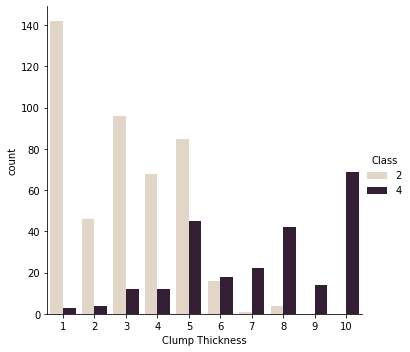

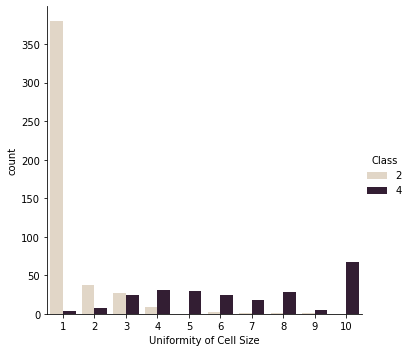

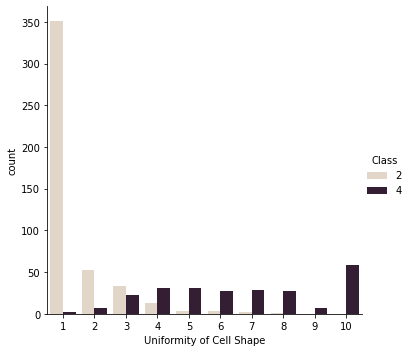

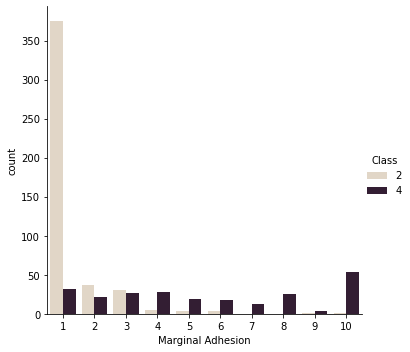

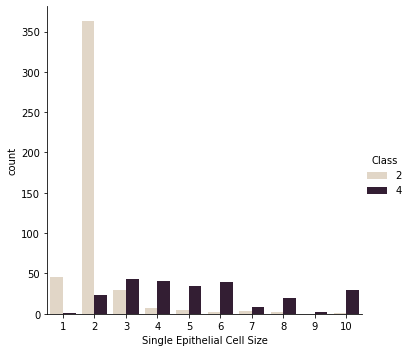

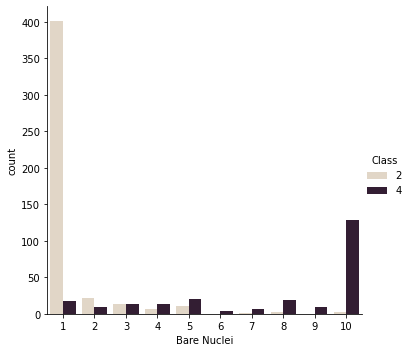

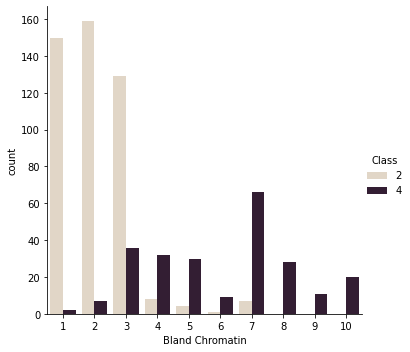

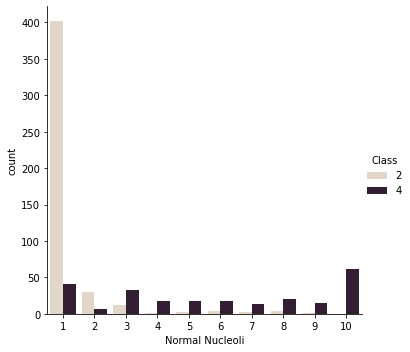

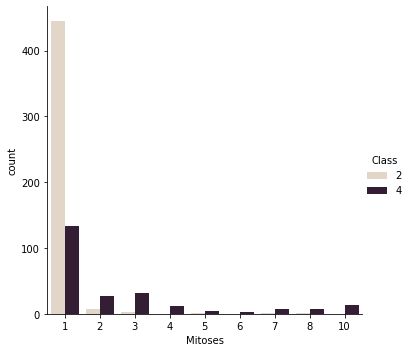

In [29]:
# As in this data set there are only 10 values, we can make use of catplot to display the distribution
# with the outcome
for cat in numerical_categories:
    sns.catplot(x=cat, hue="Class", kind="count", palette="ch:.25", data=data);

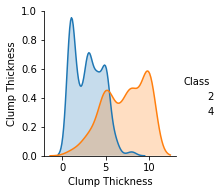

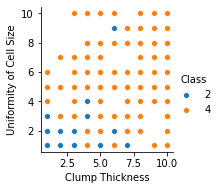

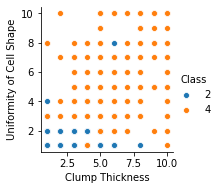

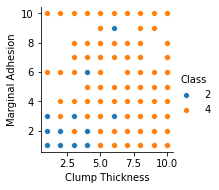

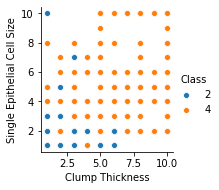

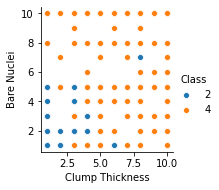

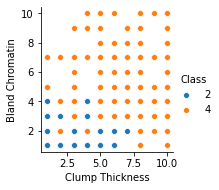

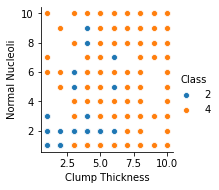

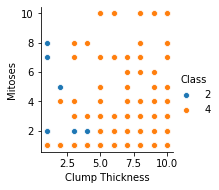

In [30]:
for cat in numerical_categories:
    sns.pairplot(data, x_vars = "Clump Thickness", y_vars=cat, hue="Class")

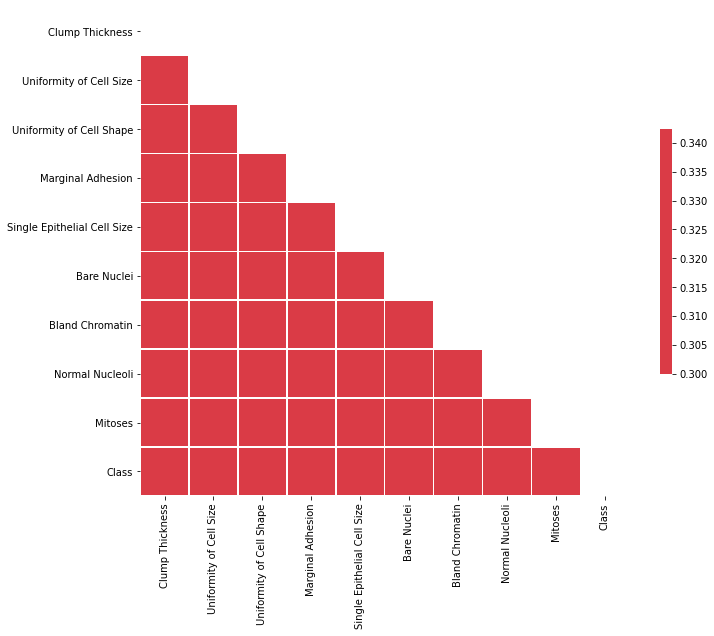

In [31]:
#Correlation between variables

import matplotlib.pyplot as plt

corr = data.corr()



# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [32]:
#PCA decomposition
features = data[numerical_categories]

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
pca_df = principalDf.join(data[['Class']].set_index(principalDf.index))
pca_df

,PC1,PC2,Class
0,-4.418342,0.032549,2
1,4.861916,-4.869842,2
2,-4.575277,-0.629610,2
3,5.165415,3.406013,2
4,-4.053561,-0.105016,2
...,...,...,...
694,-4.909523,-0.474968,2
695,-5.897575,0.189062,2
696,10.338038,7.245796,4
697,6.467189,2.526239,4


In [34]:
# We will display the coded outcome "0" & "1" instead the given outcome "2"  and "4"
outcome = data["Class"]
from sklearn.preprocessing import LabelEncoder
coded_outcome = LabelEncoder().fit_transform(outcome)
coded_outcome[0:40]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1])

In [35]:
coded_class = pd.Series(coded_outcome, index= principalDf.index, name = "coded_class")
pca_df = principalDf.join(coded_class)
pca_df

,PC1,PC2,coded_class
0,-4.418342,0.032549,0
1,4.861916,-4.869842,0
2,-4.575277,-0.629610,0
3,5.165415,3.406013,0
4,-4.053561,-0.105016,0
...,...,...,...
694,-4.909523,-0.474968,0
695,-5.897575,0.189062,0
696,10.338038,7.245796,1
697,6.467189,2.526239,1


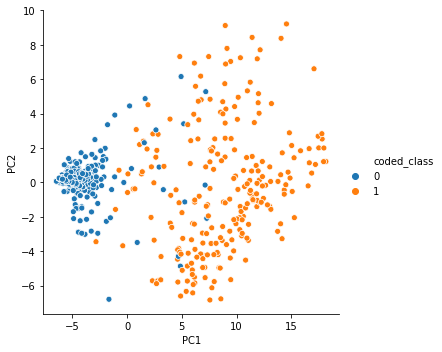

In [37]:
fig = sns.relplot(x="PC1", y="PC2", hue="coded_class",data=pca_df)

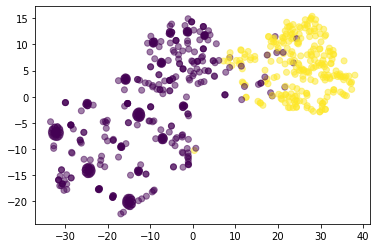

In [38]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

model = TSNE(learning_rate = 20)
transformed = model.fit_transform(features)

xs = transformed[:,0]
ys = transformed[:,1]


plt.scatter(xs, ys, c = coded_outcome, alpha = 0.5)

In [39]:
#Build a simple classifer using the features
features = features.values

In [40]:
#Run this cell multiple times. Small variation will happen based on the test set selection

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

classifer = RandomForestClassifier(max_depth = 2, n_estimators = 2)
X_train, X_test, y_train, y_test = train_test_split( features, coded_outcome, test_size = 0.1, stratify = coded_outcome)
model = classifer.fit(X_train, y_train)
print('accuracy=', classifer.score(X_test, y_test))

accuracy= 0.9571428571428572


In [42]:
from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('breast-cancer-pipeline.py')

/Users/zakigf/anaconda2/envs/eda/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")



Generation 1 - Current best internal CV score: 0.9697777777777776
Generation 2 - Current best internal CV score: 0.9697777777777776
Generation 3 - Current best internal CV score: 0.9697777777777776
Generation 4 - Current best internal CV score: 0.9713777777777779
Generation 5 - Current best internal CV score: 0.9729523809523808
Best pipeline: GradientBoostingClassifier(BernoulliNB(PCA(input_matrix, iterated_power=7, svd_solver=randomized), alpha=0.1, fit_prior=True), learning_rate=0.5, max_depth=7, max_features=0.3, min_samples_leaf=4, min_samples_split=5, n_estimators=100, subsample=0.9000000000000001)
0.9857142857142858
